In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pymysql
pymysql.install_as_MySQLdb()
import pandas as pd
import os
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii_2.sqlite")

In [3]:
Base=automap_base()
Base.prepare(engine,reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement=Base.classes.measurement
Station=Base.classes.station

In [6]:
session= Session(engine)

In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [8]:
plotting_data1=session.query(Measurement.date, Measurement.prcp).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).\
    filter(Measurement.date<='2017-05-01').\
    filter(Measurement.date>='2016-05-01').all()

In [9]:
len(plotting_data1)

366

In [10]:
dataframe_output = pd.DataFrame(plotting_data1, columns=['Dates', 'Precipitation'])
dataframe_output["Dates"]=pd.to_datetime(dataframe_output["Dates"])
l2=(max(dataframe_output['Dates']))
l1=(min(dataframe_output['Dates']))
dataframe_output.count()

Dates            366
Precipitation    366
dtype: int64

<IPython.core.display.Javascript object>


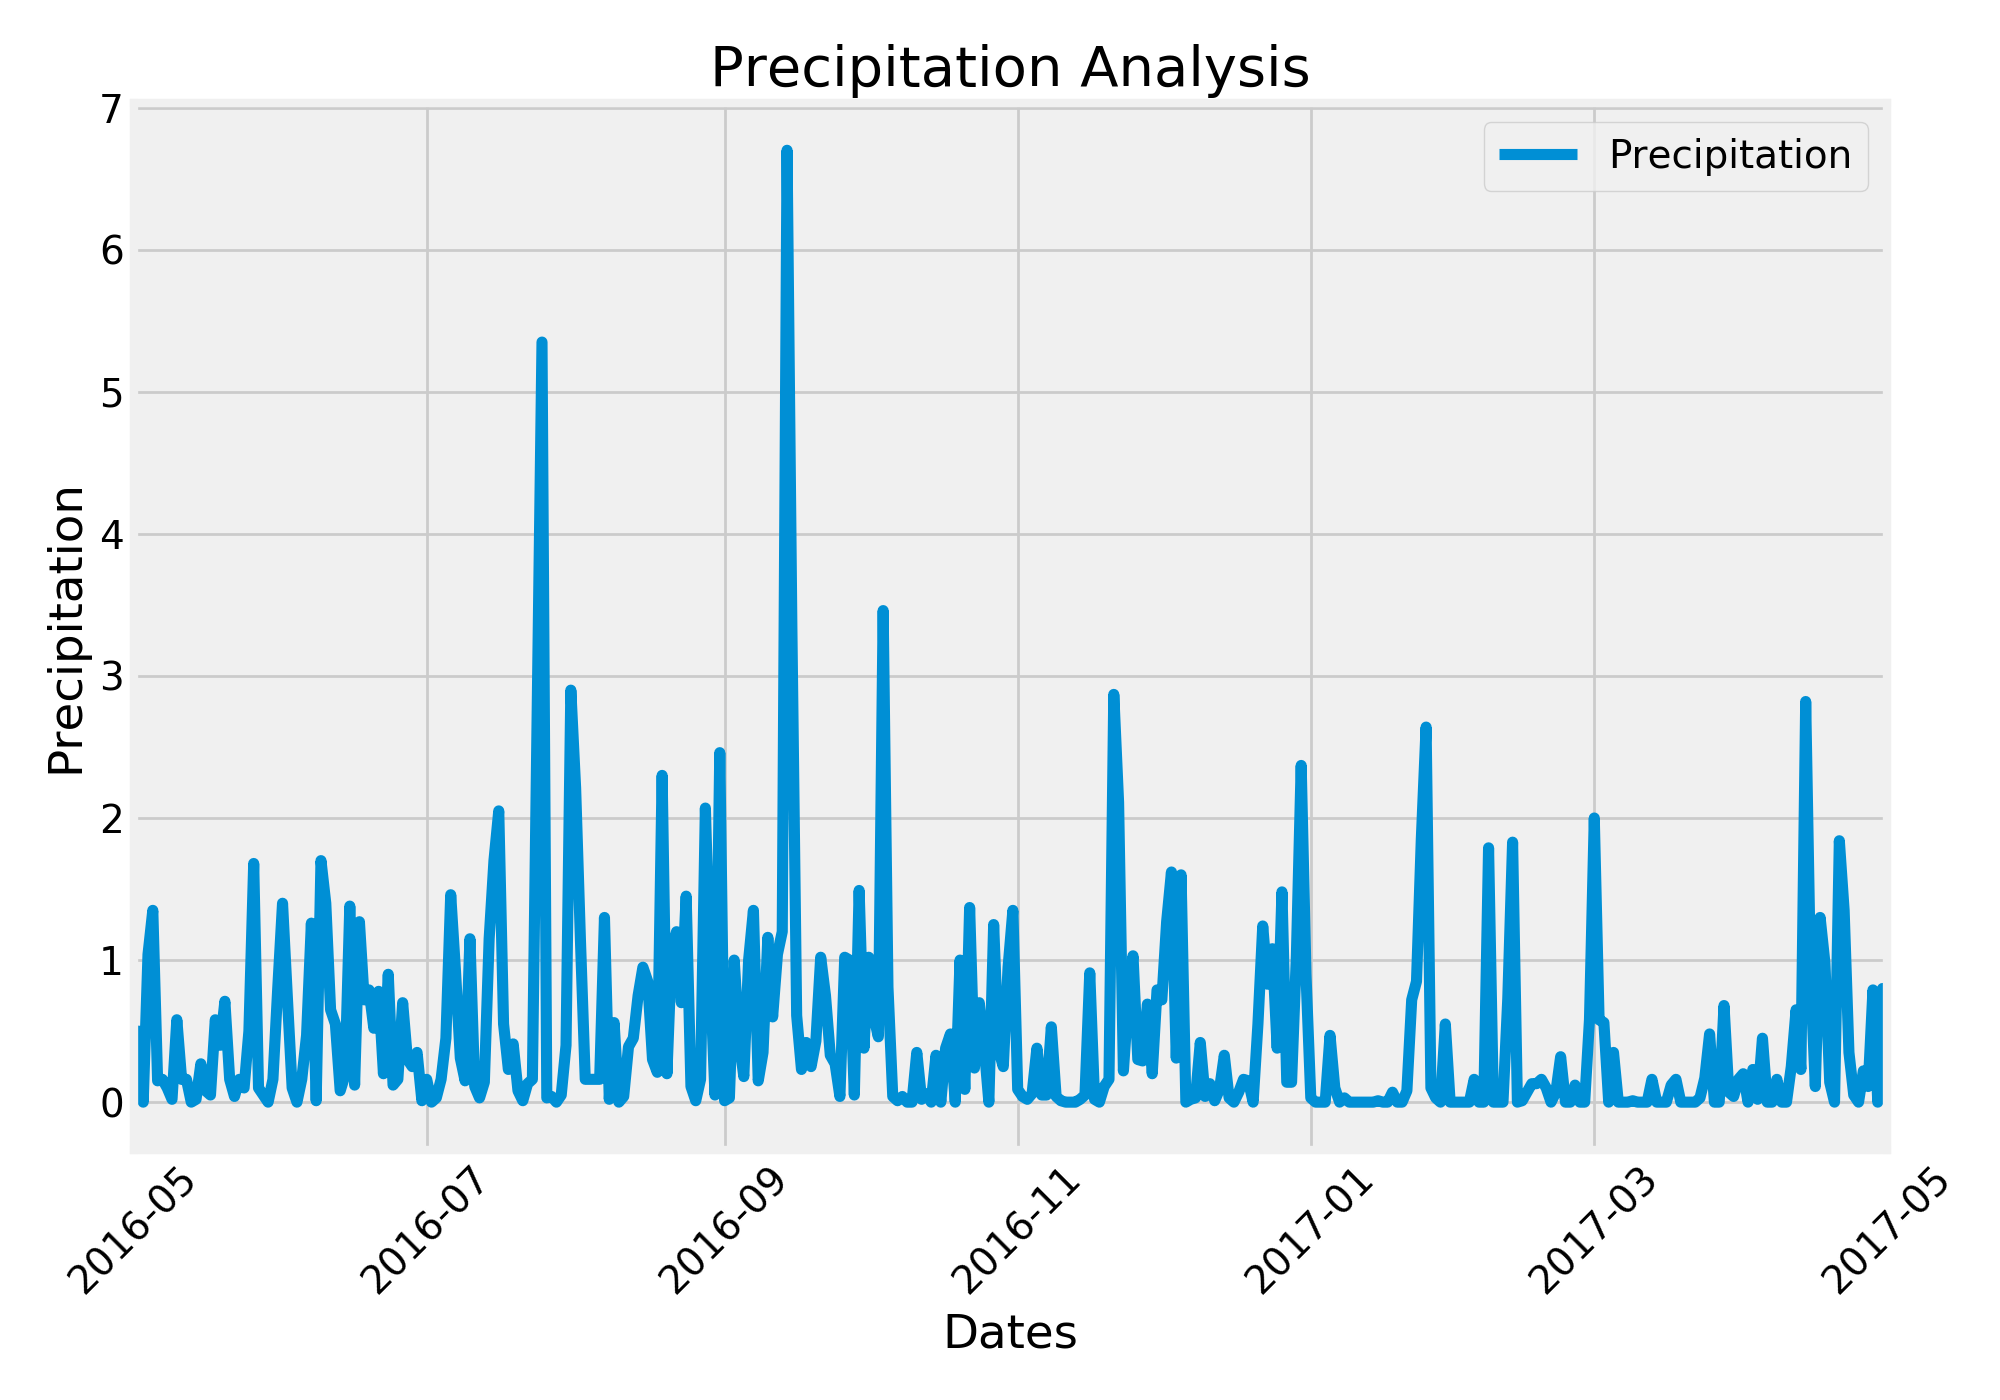

In [11]:
X=dataframe_output['Dates']
Y=dataframe_output['Precipitation']

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(X,Y)
ax.legend()
plt.xticks(rotation='45')
plt.title("Precipitation Analysis")
plt.ylabel("Precipitation")
plt.xlabel('Dates')
plt.xlim(l1,l2)
plt.tight_layout()
plt.show()

In [12]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
station_data=session.query(Measurement.station, Measurement.date,Measurement.tobs).\
    order_by(Measurement.station.desc()).\
    filter(Measurement.date<='2017-05-01').\
    filter(Measurement.date>='2016-05-01').all()
    
station_data

[('USC00519523', '2016-05-01', 78.0),
 ('USC00519523', '2016-05-02', 75.0),
 ('USC00519523', '2016-05-03', 78.0),
 ('USC00519523', '2016-05-04', 75.0),
 ('USC00519523', '2016-05-05', 77.0),
 ('USC00519523', '2016-05-06', 73.0),
 ('USC00519523', '2016-05-07', 71.0),
 ('USC00519523', '2016-05-08', 71.0),
 ('USC00519523', '2016-05-09', 73.0),
 ('USC00519523', '2016-05-10', 74.0),
 ('USC00519523', '2016-05-11', 74.0),
 ('USC00519523', '2016-05-12', 73.0),
 ('USC00519523', '2016-05-13', 75.0),
 ('USC00519523', '2016-05-14', 74.0),
 ('USC00519523', '2016-05-15', 79.0),
 ('USC00519523', '2016-05-16', 78.0),
 ('USC00519523', '2016-05-17', 78.0),
 ('USC00519523', '2016-05-18', 77.0),
 ('USC00519523', '2016-05-19', 77.0),
 ('USC00519523', '2016-05-20', 78.0),
 ('USC00519523', '2016-05-21', 78.0),
 ('USC00519523', '2016-05-22', 78.0),
 ('USC00519523', '2016-05-23', 79.0),
 ('USC00519523', '2016-05-24', 77.0),
 ('USC00519523', '2016-05-25', 77.0),
 ('USC00519523', '2016-05-26', 81.0),
 ('USC005195

In [13]:
station_df = pd.DataFrame(station_data, columns=['Stations', 'Dates','TOBS']).sort_values(by=["TOBS"], ascending=False)
station_df.dtypes


station_df["Dates"]=pd.to_datetime(station_df["Dates"])

station_df.dtypes

Stations            object
Dates       datetime64[ns]
TOBS               float64
dtype: object

<IPython.core.display.Javascript object>


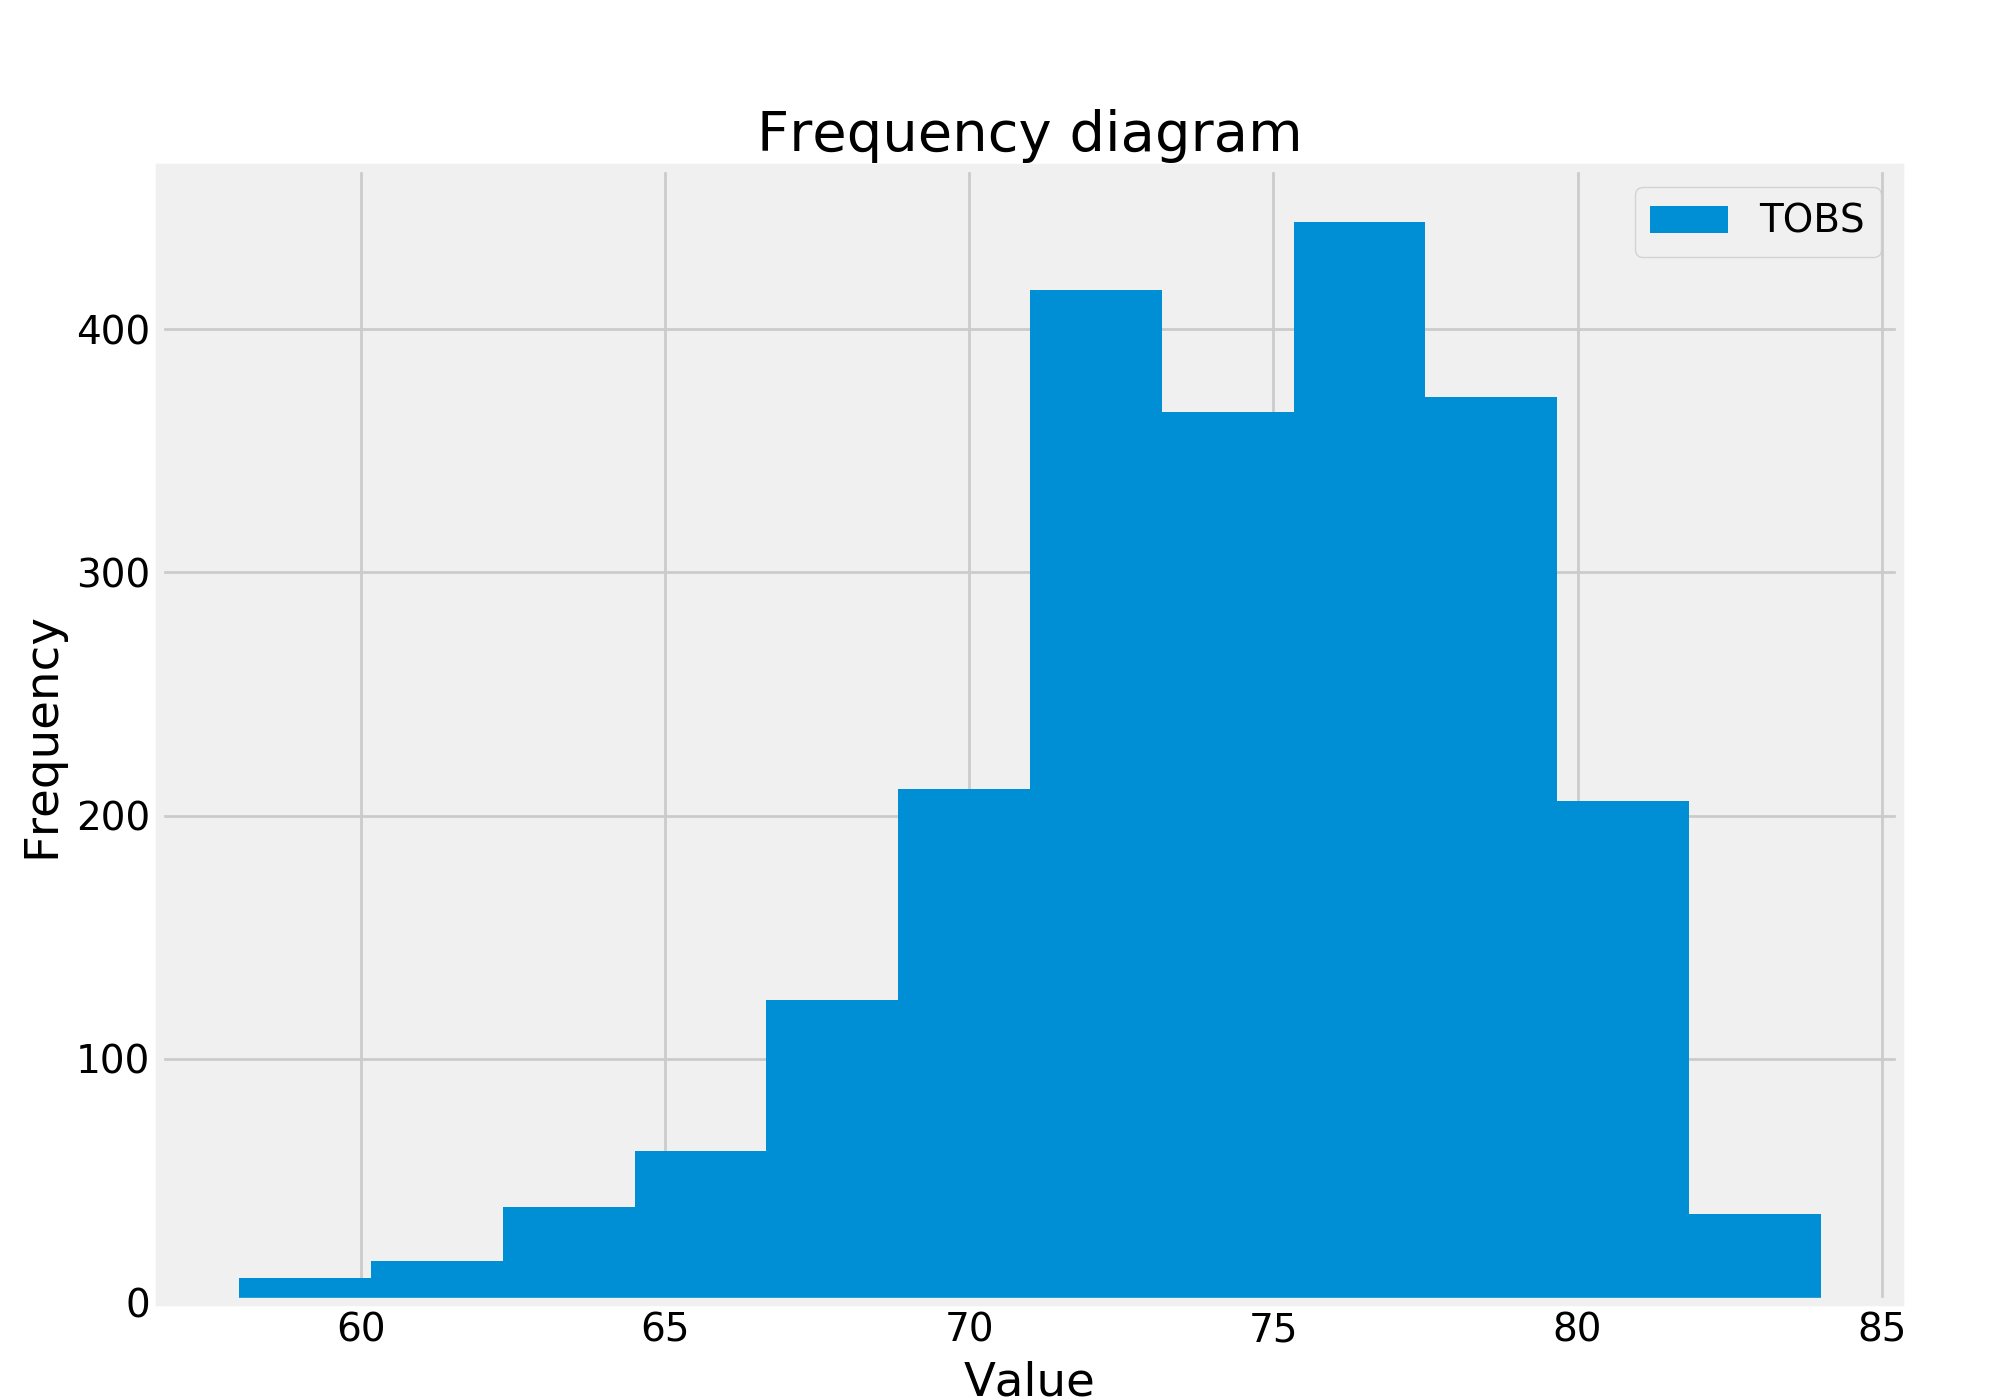

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(station_df['TOBS'],bins=12)
ax.legend()
plt.title("Frequency diagram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

[58.0, 74.2987407729049, 84.0]


<IPython.core.display.Javascript object>


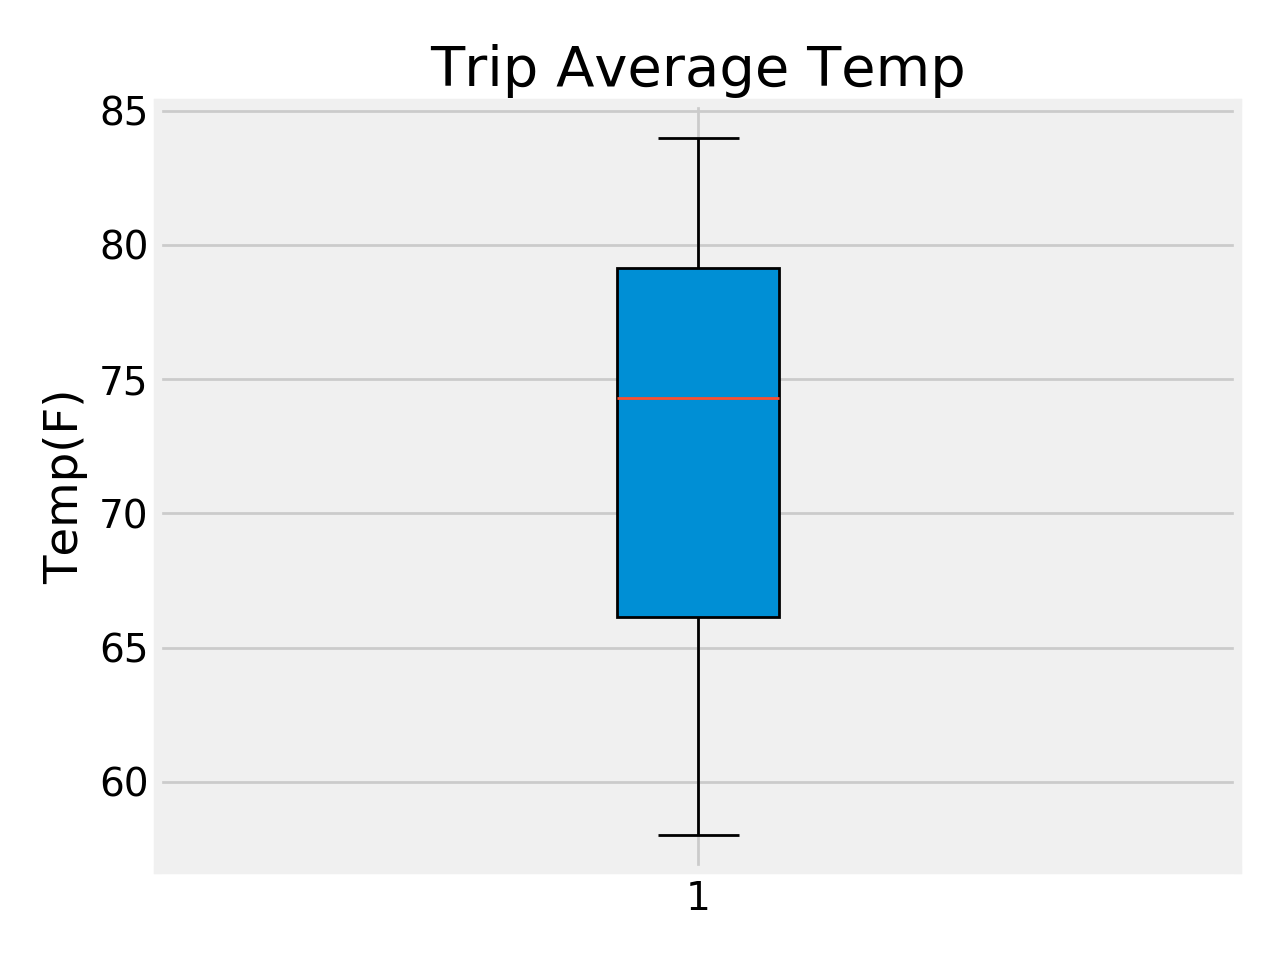

In [16]:
min_temp=0
max_temp=0
avg_temp=0
def calc_temps(start_date, end_date):
    min_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date<=end_date).\
    filter(Measurement.date>=start_date).all()
    max_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date<=end_date).\
    filter(Measurement.date>=start_date).all()
    avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date<=end_date).\
    filter(Measurement.date>=start_date).all()
    return (min_temp, avg_temp, max_temp)

MinAvgMaxTemp=calc_temps('2016-05-01','2017-05-01')
MinAvgMaxTemp
ptps = list(np.ravel(MinAvgMaxTemp))
print(ptps)
fig, ax = plt.subplots()
x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('Trip Average Temp')
plt.ylabel("Temp(F)")
fig.tight_layout()
plt.show()

([(72.0,)], [(78.125,)], [(83.0,)])


<IPython.core.display.Javascript object>


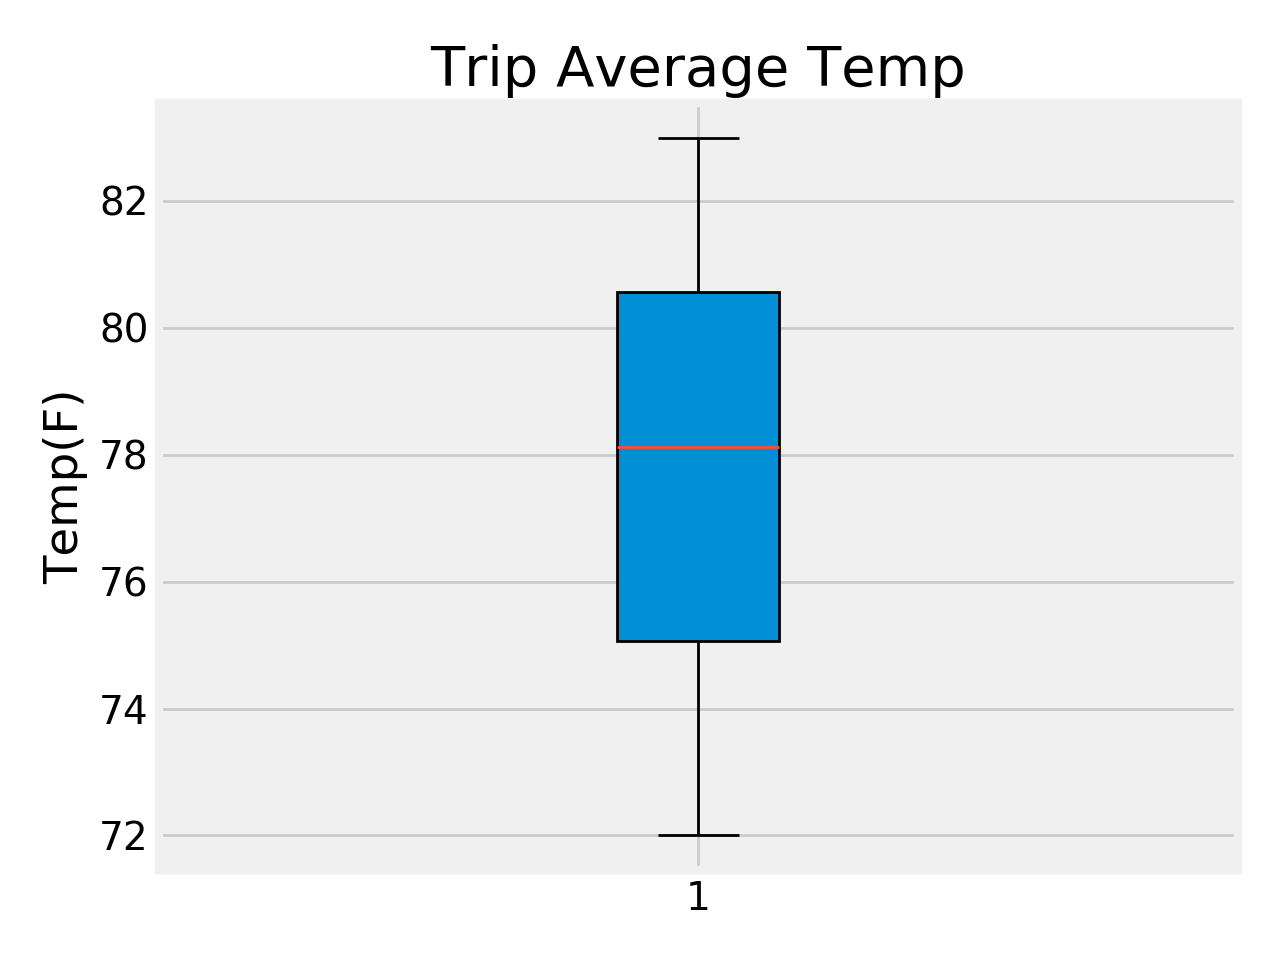

In [17]:
Trip_Start_Date='2018-07-31'
Trip_End_Date='2018-08-04'
tripstart_date = dt.datetime.strptime(Trip_Start_Date, "%Y-%m-%d") - dt.timedelta(days=365)
tripend_date = dt.datetime.strptime(Trip_End_Date, "%Y-%m-%d") - dt.timedelta(days=365)
MinAvgMaxTemp2=calc_temps(tripstart_date, tripend_date)
ptp = list(np.ravel(MinAvgMaxTemp2))
print(MinAvgMaxTemp2)

fig, ax = plt.subplots()
x = range(len(ptp))
ax.boxplot(ptp, patch_artist=True)
ax.set_title('Trip Average Temp')
plt.ylabel("Temp(F)")
fig.tight_layout()
plt.show()